# PR PYTHON 
A. buat minimum 5 insigth terbaik Anda dari kumpulan data super store <br>
B. buatlah list customer yang mengorder Category furniture tetapi tidak order Office Supplies di 2017

#### IMPORTING LIBRARIES

In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### READING THE DATA 

In [171]:
df = pd.read_csv('csv/Sample_Superstore.csv')
df.head()

,Category,City,Country,Customer Name,Discount,Number of Records,Order Date,Order ID,Postal Code,Manufacturer,Product Name,Profit,Quantity,Region,Sales,Segment,Ship Date,Ship Mode,State,Sub-Category
0,Furniture,Henderson,United States,Claire Gute,0.00,1,11/8/2017,CA-2017-152156,42420.0,Bush,Bush Somerset Collection Bookcase,41.9136,2,South,261.9600,Consumer,11/11/2017,Second Class,Kentucky,Bookcases
1,Furniture,Henderson,United States,Claire Gute,0.00,1,11/8/2017,CA-2017-152156,42420.0,Hon,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",219.5820,3,South,731.9400,Consumer,11/11/2017,Second Class,Kentucky,Chairs
2,Office Supplies,Los Angeles,United States,Darrin Van Huff,0.00,1,6/12/2017,CA-2017-138688,90036.0,Universal,Self-Adhesive Address Labels for Typewriters b...,6.8714,2,West,14.6200,Corporate,6/16/2017,Second Class,California,Labels
3,Furniture,Fort Lauderdale,United States,Sean O'Donnell,0.45,1,10/11/2016,US-2016-108966,33311.0,Bretford,Bretford CR4500 Series Slim Rectangular Table,-383.0310,5,South,957.5775,Consumer,10/18/2016,Standard Class,Florida,Tables
4,Office Supplies,Fort Lauderdale,United States,Sean O'Donnell,0.20,1,10/11/2016,US-2016-108966,33311.0,Eldon,Eldon Fold 'N Roll Cart System,2.5164,2,South,22.3680,Consumer,10/18/2016,Standard Class,Florida,Storage


#### EXPLORASI DATA

In [172]:
## Menghitung rows dan column
df.shape

(9994, 20)

In [173]:
## Memeriksa type data columns of columns/attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 20 columns):
Category             9994 non-null object
City                 9994 non-null object
Country              9994 non-null object
Customer Name        9994 non-null object
Discount             9994 non-null float64
Number of Records    9994 non-null int64
Order Date           9994 non-null object
Order ID             9994 non-null object
Postal Code          9983 non-null float64
Manufacturer         9994 non-null object
Product Name         9994 non-null object
Profit               9994 non-null float64
Quantity             9994 non-null int64
Region               9994 non-null object
Sales                9994 non-null float64
Segment              9994 non-null object
Ship Date            9994 non-null object
Ship Mode            9994 non-null object
State                9994 non-null object
Sub-Category         9994 non-null object
dtypes: float64(4), int64(2), object(14)
memory usa

In [174]:
df.describe()

,Discount,Number of Records,Postal Code,Profit,Quantity,Sales
count,9994.000000,9994.0,9983.000000,9994.000000,9994.000000,9994.000000
mean,0.156203,1.0,55245.233297,28.656896,3.789574,229.858001
std,0.206452,0.0,32038.715955,234.260108,2.225110,623.245101
min,0.000000,1.0,1040.000000,-6599.978000,1.000000,0.444000
25%,0.000000,1.0,23223.000000,1.728750,2.000000,17.280000
50%,0.200000,1.0,57103.000000,8.666500,3.000000,54.490000
75%,0.200000,1.0,90008.000000,29.364000,5.000000,209.940000
max,0.800000,1.0,99301.000000,8399.976000,14.000000,22638.480000


In [175]:
## Memeriksa apakah ada yang missing value
df.isnull().sum()

Category              0
City                  0
Country               0
Customer Name         0
Discount              0
Number of Records     0
Order Date            0
Order ID              0
Postal Code          11
Manufacturer          0
Product Name          0
Profit                0
Quantity              0
Region                0
Sales                 0
Segment               0
Ship Date             0
Ship Mode             0
State                 0
Sub-Category          0
dtype: int64

terdapat nilai null pada Postal Code sebanyak 11 

In [176]:
## hapus niali nol 
df = df.dropna()
df.head()

,Category,City,Country,Customer Name,Discount,Number of Records,Order Date,Order ID,Postal Code,Manufacturer,Product Name,Profit,Quantity,Region,Sales,Segment,Ship Date,Ship Mode,State,Sub-Category
0,Furniture,Henderson,United States,Claire Gute,0.00,1,11/8/2017,CA-2017-152156,42420.0,Bush,Bush Somerset Collection Bookcase,41.9136,2,South,261.9600,Consumer,11/11/2017,Second Class,Kentucky,Bookcases
1,Furniture,Henderson,United States,Claire Gute,0.00,1,11/8/2017,CA-2017-152156,42420.0,Hon,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",219.5820,3,South,731.9400,Consumer,11/11/2017,Second Class,Kentucky,Chairs
2,Office Supplies,Los Angeles,United States,Darrin Van Huff,0.00,1,6/12/2017,CA-2017-138688,90036.0,Universal,Self-Adhesive Address Labels for Typewriters b...,6.8714,2,West,14.6200,Corporate,6/16/2017,Second Class,California,Labels
3,Furniture,Fort Lauderdale,United States,Sean O'Donnell,0.45,1,10/11/2016,US-2016-108966,33311.0,Bretford,Bretford CR4500 Series Slim Rectangular Table,-383.0310,5,South,957.5775,Consumer,10/18/2016,Standard Class,Florida,Tables
4,Office Supplies,Fort Lauderdale,United States,Sean O'Donnell,0.20,1,10/11/2016,US-2016-108966,33311.0,Eldon,Eldon Fold 'N Roll Cart System,2.5164,2,South,22.3680,Consumer,10/18/2016,Standard Class,Florida,Storage


In [177]:
### cek kembali nilai null
df.isnull().sum()

Category             0
City                 0
Country              0
Customer Name        0
Discount             0
Number of Records    0
Order Date           0
Order ID             0
Postal Code          0
Manufacturer         0
Product Name         0
Profit               0
Quantity             0
Region               0
Sales                0
Segment              0
Ship Date            0
Ship Mode            0
State                0
Sub-Category         0
dtype: int64

Sudah tidak ada nilai null Pada Coloumn Postal Code

In [178]:
## Periksa perhitungan Country
df['Country'].value_counts()


United States    9983
Name: Country, dtype: int64

Jelas bahwa data hanya untuk negara AS, jadi kami dapat menghapus kolom 'Negara' karena kami tidak memerlukan analisis apa pun untuk dilakukan berdasarkan data tersebut.

jelas hanya ada AS, jadi dapat dihapus kolom Country, karena tidak memerlukan data tersebut 

In [179]:
## Drop country
df = df.drop('Country', axis=1)
df.head()

,Category,City,Customer Name,Discount,Number of Records,Order Date,Order ID,Postal Code,Manufacturer,Product Name,Profit,Quantity,Region,Sales,Segment,Ship Date,Ship Mode,State,Sub-Category
0,Furniture,Henderson,Claire Gute,0.00,1,11/8/2017,CA-2017-152156,42420.0,Bush,Bush Somerset Collection Bookcase,41.9136,2,South,261.9600,Consumer,11/11/2017,Second Class,Kentucky,Bookcases
1,Furniture,Henderson,Claire Gute,0.00,1,11/8/2017,CA-2017-152156,42420.0,Hon,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",219.5820,3,South,731.9400,Consumer,11/11/2017,Second Class,Kentucky,Chairs
2,Office Supplies,Los Angeles,Darrin Van Huff,0.00,1,6/12/2017,CA-2017-138688,90036.0,Universal,Self-Adhesive Address Labels for Typewriters b...,6.8714,2,West,14.6200,Corporate,6/16/2017,Second Class,California,Labels
3,Furniture,Fort Lauderdale,Sean O'Donnell,0.45,1,10/11/2016,US-2016-108966,33311.0,Bretford,Bretford CR4500 Series Slim Rectangular Table,-383.0310,5,South,957.5775,Consumer,10/18/2016,Standard Class,Florida,Tables
4,Office Supplies,Fort Lauderdale,Sean O'Donnell,0.20,1,10/11/2016,US-2016-108966,33311.0,Eldon,Eldon Fold 'N Roll Cart System,2.5164,2,South,22.3680,Consumer,10/18/2016,Standard Class,Florida,Storage


### A. Buat Min 5 insigth pada Data Super Store

#### 1. Product category yang tersedia untuk customer yang belanja

In [180]:
df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [181]:
## number of product in ech category 
df['Category'].value_counts()

Office Supplies    6020
Furniture          2119
Technology         1844
Name: Category, dtype: int64

In [182]:
## number of sub-category product are divided
df['Sub-Category'].nunique()

17

In [183]:
#number of product in ech sub-category
df['Sub-Category'].value_counts()

Binders        1523
Paper          1368
Furnishings     957
Phones          888
Storage         845
Art             795
Accessories     773
Chairs          616
Appliances      465
Labels          364
Tables          319
Envelopes       253
Bookcases       227
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

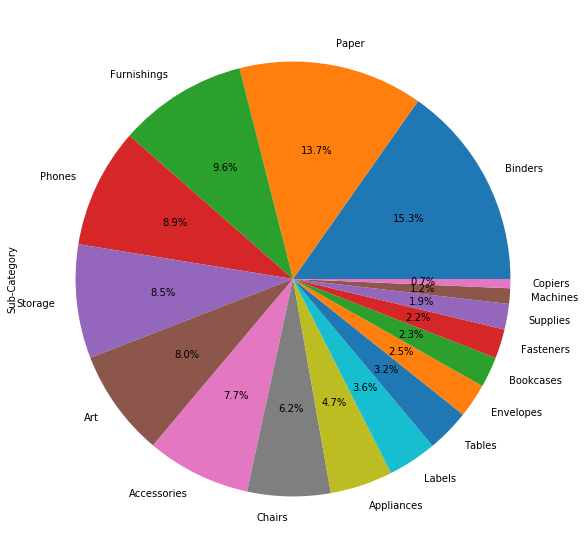

<Figure size 432x288 with 0 Axes>

In [185]:
plt.figure(figsize=(12,10))
df['Sub-Category'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

plt.savefig('fig/pieplot_tugas_python.png', tight_box=True)

Artinya :<br>
Dari diagram pie diatas dapat dilihat bahwa untuk barang seperti Paper dan binder memiliki ketersediaan barang terbanyak dibandingkan dengan barang yang lain. 

##### 2.  Subkategori di distribusikan ke kategori

Text(0.5, 1.0, 'Pendistribusian Sub-Kategori ke KAtegory')

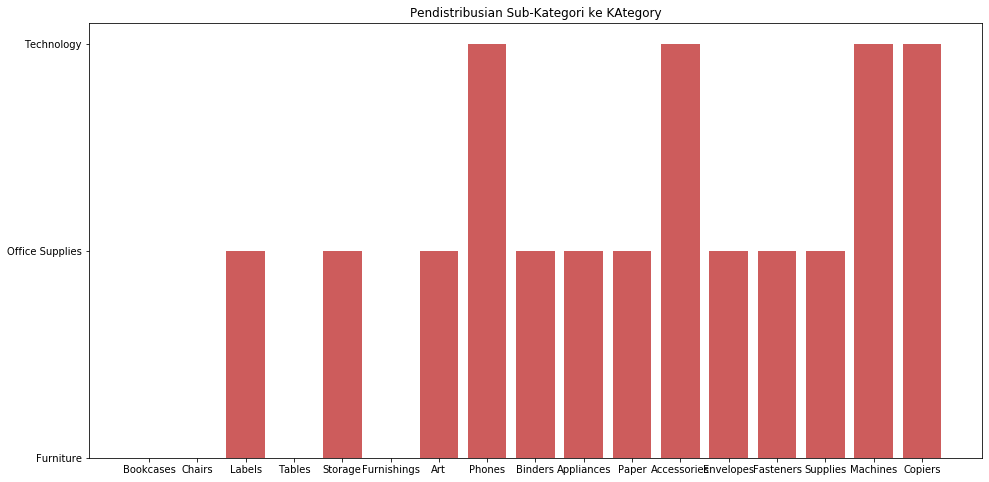

In [132]:
# Mari kita lihat bagaimana sub-kategori didistribusikan ke kategori
plt.figure(figsize=(16,8))
plt.bar('Sub-Category','Category', data=df, color='indianred')
plt.title('Pendistribusian Sub-Kategori ke KAtegory')

Artinya : <br>Dari grafik ini, orang dapat dengan mudah melihat Kategori dan Sub-Kategori mana yang akan dipilih ketika mereka ingin membeli suatu produk

#### 3. Membandingkan Sub-Kategori dengan Penjualan 

<function matplotlib.pyplot.show(*args, **kw)>

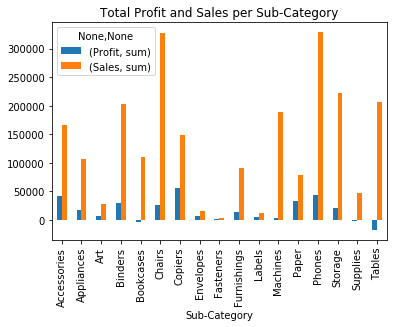

In [133]:
df.groupby('Sub-Category')['Profit','Sales'].agg(['sum']).plot.bar()
plt.title('Total Profit and Sales per Sub-Category')

plt.show

Artinya : <br>Keuntungan tertinggi diperoleh di mesin fotokopi sementara harga jual untuk Kursi dan Ponsel sangat tinggi dibandingkan dengan produk lain.

Fakta menarik lainnya - orang tidak suka membeli Meja dan Rak Buku dari Superstore. Karenanya departemen ini merugi.

#### 4. Menghitung Subkategori dari setiap wilayah 

<function matplotlib.pyplot.show(*args, **kw)>

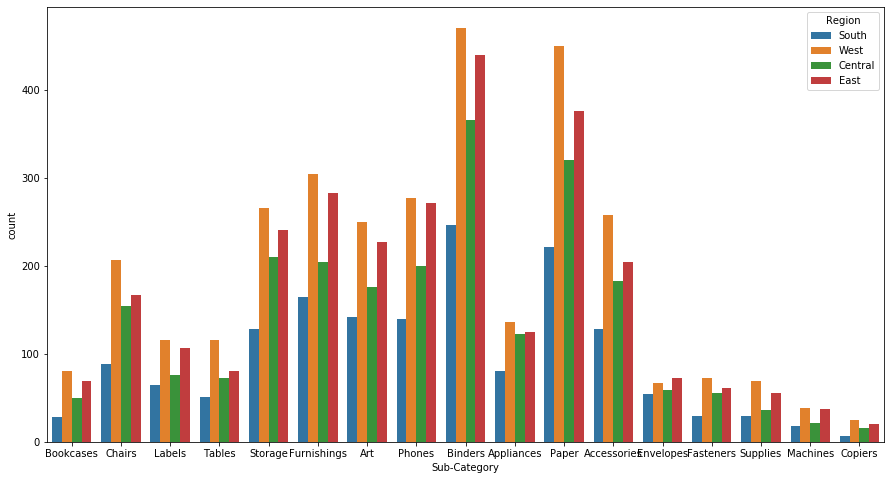

In [134]:
 
plt.figure(figsize=(15,8))
sns.countplot(x="Sub-Category", hue='Region', data=df)
plt.show

Orang-orang yang tinggal di bagian barat AS cenderung memesan lebih banyak dari superstore.

#### 5. Menghitung Cots dan Profit dalam Persen (%)

In [135]:
df['Cost']=df['Sales'] - df['Profit']
df['Cost'].head()

0     220.0464
1     512.3580
2       7.7486
3    1340.6085
4      19.8516
Name: Cost, dtype: float64

In [136]:
df['Profit %']=(df['Profit']/df['Cost'])*100

In [137]:
#Profit Percentage of first 5 product names
df[['Product Name','Profit %']].head(5)

,Product Name,Profit %
0,Bush Somerset Collection Bookcase,19.047619
1,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",42.857143
2,Self-Adhesive Address Labels for Typewriters b...,88.679245
3,Bretford CR4500 Series Slim Rectangular Table,-28.571429
4,Eldon Fold 'N Roll Cart System,12.676056


In [138]:
#Product with high profit percentage
df.sort_values(['Profit %', 'Product Name'], ascending = False).groupby('Profit').head(5)

,Category,City,Customer Name,Discount,Number of Records,Order Date,Order ID,Postal Code,Manufacturer,Product Name,...,Quantity,Region,Sales,Segment,Ship Date,Ship Mode,State,Sub-Category,Cost,Profit %
9787,Technology,Bayonne,Phillina Ober,0.0,1,9/25/2016,CA-2016-156335,7002.0,Other,netTALK DUO VoIP Telephone Service,...,2,East,104.980,Home Office,9/28/2016,Second Class,New Jersey,Phones,52.4900,100.000000
6736,Office Supplies,Gulfport,Henry Goldwyn,0.0,1,1/24/2017,CA-2017-109407,39503.0,XtraLife,XtraLife ClearVue Slant-D Ring Binders by Card...,...,4,South,31.360,Corporate,1/26/2017,Second Class,Mississippi,Binders,15.6800,100.000000
2537,Office Supplies,Seattle,Resi Pölking,0.0,1,9/13/2015,CA-2015-142769,98103.0,Xerox,Xerox 1942,...,1,West,48.940,Consumer,9/13/2015,Same Day,Washington,Paper,24.4700,100.000000
2966,Office Supplies,Los Angeles,Christopher Conant,0.0,1,7/7/2017,CA-2017-135265,90045.0,Xerox,Xerox 1942,...,1,West,48.940,Consumer,7/9/2017,Second Class,California,Paper,24.4700,100.000000
7182,Office Supplies,Clinton,Odella Nelson,0.0,1,12/2/2015,CA-2015-154095,20735.0,Xerox,Xerox 1942,...,3,East,146.820,Corporate,12/7/2015,Standard Class,Maryland,Paper,73.4100,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7095,Office Supplies,Austin,Cynthia Voltz,0.8,1,5/9/2017,US-2017-144057,78745.0,Euro Pro,Euro Pro Shark Stick Mini Vacuum,...,4,Central,48.784,Corporate,5/13/2017,Standard Class,Texas,Appliances,180.5008,-72.972973
7088,Office Supplies,Fort Worth,Brenda Bowman,0.8,1,11/21/2016,CA-2016-107083,76106.0,Kensington,Kensington 6 Outlet SmartSocket Surge Protector,...,3,Central,24.588,Corporate,11/27/2016,Standard Class,Texas,Appliances,92.2050,-73.333333
3463,Office Supplies,Chicago,Maureen Gnade,0.8,1,6/8/2016,CA-2016-164007,60610.0,Hoover,Hoover Shoulder Vac Commercial Portable Vacuum,...,2,Central,143.128,Consumer,6/12/2016,Standard Class,Illinois,Appliances,536.7300,-73.333333
676,Office Supplies,Tyler,Carol Darley,0.8,1,3/18/2018,US-2018-119438,75701.0,Hoover,Hoover Portapower Portable Vacuum,...,3,Central,2.688,Consumer,3/23/2018,Standard Class,Texas,Appliances,10.0800,-73.333333


Artinya : <br>Retailers yang menjual Telepon, binder dan Papers telah mendapat Untung 100% dalam Bisnis mereka.

#### 6. Menghitung Data Customers Nama 10 Teratas

In [139]:
#Top 10 customers who order frequently
df_top10=df['Customer Name'].value_counts().head(10)
df_top10

William Brown          37
Paul Prost             34
John Lee               34
Matt Abelman           34
Edward Hooks           32
Seth Vernon            32
Chloris Kastensmidt    32
Jonathan Doherty       32
Arthur Prichep         31
Emily Phan             31
Name: Customer Name, dtype: int64

#### 7. Menghitung Data Segment

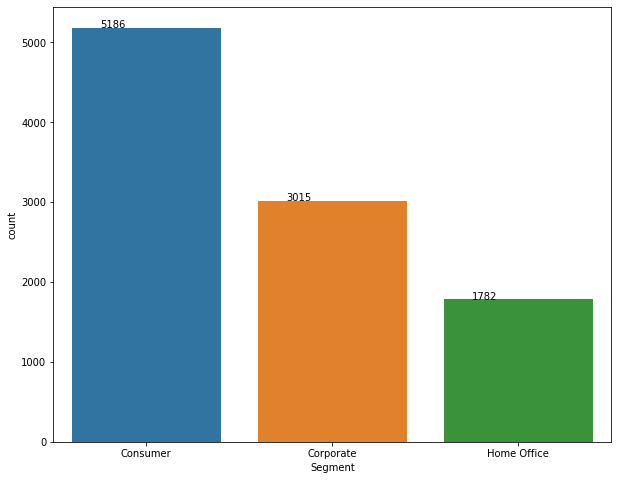

In [140]:
fig=plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
s=sns.countplot('Segment', data = df)
for s in ax.patches:
    ax.annotate('{:.0f}'.format(s.get_height()), (s.get_x()+0.15, s.get_height()+1))
plt.show()

Artinya :<br>Distribusi tertinggi di Segmen Konsumen.

#### 8. Menghitung Customer  yang Menguntungkan di setiap negara 

In [141]:
df['Customer Name'].head()

0        Claire Gute
1        Claire Gute
2    Darrin Van Huff
3     Sean O'Donnell
4     Sean O'Donnell
Name: Customer Name, dtype: object

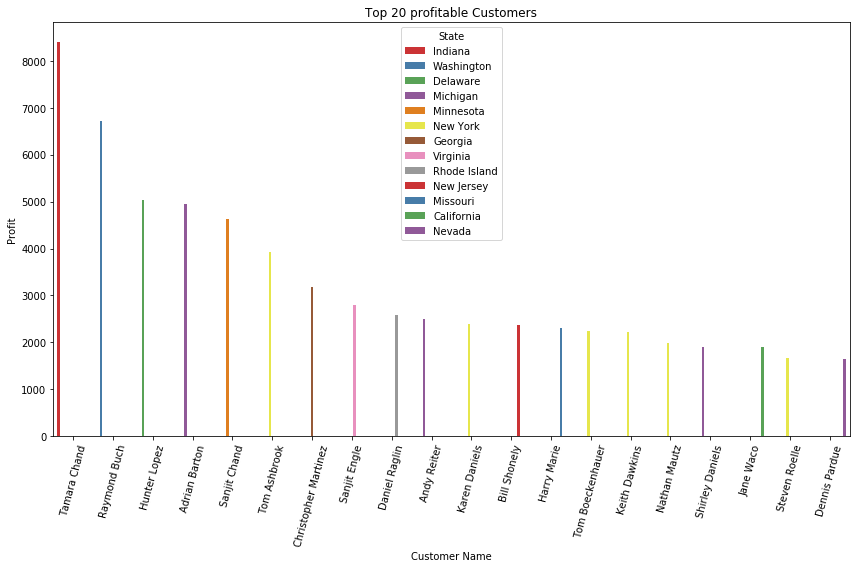

In [142]:

sortedTop20 = df.sort_values(['Profit'], ascending=False).head(20)
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
p = sns.barplot(x='Customer Name', y='Profit',hue='State',palette='Set1', data=sortedTop20, ax=ax)
ax.set_title("Top 20 profitable Customers")

ax.set_xticklabels(p.get_xticklabels(), rotation=75)

plt.tight_layout()
plt.show()

Artinya :<br> Kami melihat bahwa mayoritas Pelanggan yang Menguntungkan berasal dari Negara Bagian New York dan Michigan.

#### 9. Top20 oldest Customer

In [143]:
oldest = pd.DataFrame({'Count' : df.groupby(["Order Date","Customer Name"]).size()}).reset_index()

In [144]:
oldest.head(20)

,Order Date,Customer Name,Count
0,1/1/2018,Dennis Pardue,1
1,1/1/2018,Guy Armstrong,1
2,1/1/2018,Janet Martin,7
3,1/1/2018,Steven Cartwright,1
4,1/10/2015,Anthony Jacobs,2
5,1/10/2016,Michael Moore,1
6,1/10/2017,Joy Bell-,1
7,1/10/2017,Ken Black,2
8,1/11/2015,Seth Vernon,1
9,1/11/2017,Deanra Eno,3


Artinya :<br> customer tertua adalah Dennis Perdue, Guy Amstrong, Steven Cartwright	,Michael Moore	,Joy Bell-	,Seth Vernon,Mark Packer,Linda Southworth	

#### 10. Hubungan antara Sales dan Profit

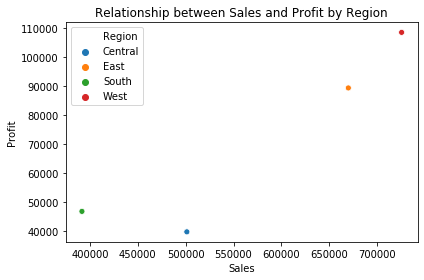

In [145]:

regionwiseSalesAndProfit = df.groupby("Region").agg({"Sales":np.sum, "Profit": np.sum})
regionwiseSalesAndProfit
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
p = sns.scatterplot(x="Sales", y="Profit", hue=regionwiseSalesAndProfit.index, data=regionwiseSalesAndProfit) # kind="scatter")
ax.set_title("Relationship between Sales and Profit by Region")
plt.tight_layout()
plt.show()

Artinya: <br> Penjualan yang sangat menguntungkan berada pada daerah barat.

In [146]:
x = df.sort_values('Profit', ascending=False)
top20 = x.head(20)
top20[['Customer Name', 'Profit']] 

,Customer Name,Profit
8093,Tamara Chand,8399.9760
4905,Raymond Buch,6719.9808
5297,Hunter Lopez,5039.9856
3273,Adrian Barton,4946.3700
3232,Sanjit Chand,4630.4755
9707,Tom Ashbrook,3919.9888
509,Christopher Martinez,3177.4750
5083,Sanjit Engle,2799.9840
9888,Daniel Raglin,2591.9568
2627,Andy Reiter,2504.2216


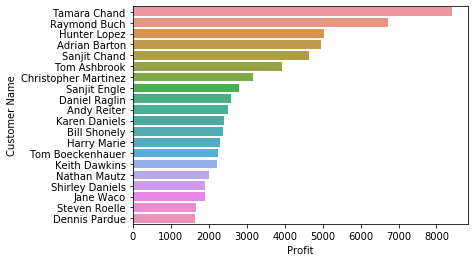

In [147]:
sns.barplot(x = "Profit", y= "Customer Name", data=top20)

Artinya :<br> hasil penjualan yang sangat menguntungkan adalah kepada Tamara Chand dengan pendapatan sebesar $8399.9760

##### Menghitung Diskount Yang Paling Tinggi

In [148]:
df= df.groupby(['Product Name'])['Discount'].describe().reset_index().sort_values(by = 'max', ascending = False).head()

In [149]:
df

,Product Name,count,mean,std,min,25%,50%,75%,max
924,Insertable Tab Post Binder Dividers,8.0,0.575000,0.301188,0.0,0.575,0.7,0.725,0.8
247,Avery Heavy-Duty EZD View Binder with Locking ...,10.0,0.350000,0.374907,0.0,0.000,0.2,0.775,0.8
458,Commercial WindTunnel Clean Air Upright Vacuum...,7.0,0.228571,0.390360,0.0,0.000,0.0,0.400,0.8
701,GBC ProClick 150 Presentation Binding System,5.0,0.500000,0.374166,0.0,0.200,0.7,0.800,0.8
698,GBC Premium Transparent Covers with Diagonal L...,14.0,0.400000,0.280110,0.2,0.200,0.2,0.700,0.8


Artinya:<br> Product yang memiliki discount paling tinggi adalah barang Insertable Tab Post Binder Dividers

## B. Buatlah List Customer yang Order Category Furniture Tetapi Tidak Order Office Supplies di tahun 2017

In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [151]:
df1 = pd.read_csv('csv/Sample_Superstore.csv')
df1.head()

,Category,City,Country,Customer Name,Discount,Number of Records,Order Date,Order ID,Postal Code,Manufacturer,Product Name,Profit,Quantity,Region,Sales,Segment,Ship Date,Ship Mode,State,Sub-Category
0,Furniture,Henderson,United States,Claire Gute,0.00,1,11/8/2017,CA-2017-152156,42420.0,Bush,Bush Somerset Collection Bookcase,41.9136,2,South,261.9600,Consumer,11/11/2017,Second Class,Kentucky,Bookcases
1,Furniture,Henderson,United States,Claire Gute,0.00,1,11/8/2017,CA-2017-152156,42420.0,Hon,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",219.5820,3,South,731.9400,Consumer,11/11/2017,Second Class,Kentucky,Chairs
2,Office Supplies,Los Angeles,United States,Darrin Van Huff,0.00,1,6/12/2017,CA-2017-138688,90036.0,Universal,Self-Adhesive Address Labels for Typewriters b...,6.8714,2,West,14.6200,Corporate,6/16/2017,Second Class,California,Labels
3,Furniture,Fort Lauderdale,United States,Sean O'Donnell,0.45,1,10/11/2016,US-2016-108966,33311.0,Bretford,Bretford CR4500 Series Slim Rectangular Table,-383.0310,5,South,957.5775,Consumer,10/18/2016,Standard Class,Florida,Tables
4,Office Supplies,Fort Lauderdale,United States,Sean O'Donnell,0.20,1,10/11/2016,US-2016-108966,33311.0,Eldon,Eldon Fold 'N Roll Cart System,2.5164,2,South,22.3680,Consumer,10/18/2016,Standard Class,Florida,Storage


In [152]:
df1[['Category', 'Sub-Category', 'City', 'Country', 'Order ID','Order Date']].head()

,Category,Sub-Category,City,Country,Order ID,Order Date
0,Furniture,Bookcases,Henderson,United States,CA-2017-152156,11/8/2017
1,Furniture,Chairs,Henderson,United States,CA-2017-152156,11/8/2017
2,Office Supplies,Labels,Los Angeles,United States,CA-2017-138688,6/12/2017
3,Furniture,Tables,Fort Lauderdale,United States,US-2016-108966,10/11/2016
4,Office Supplies,Storage,Fort Lauderdale,United States,US-2016-108966,10/11/2016


In [153]:
dfgroup= df1.groupby(['Category','Order Date'])['Order ID'].count().reset_index().sort_values(by='Order ID',ascending=False)
dfgroup.columns = ['Category','Order Date', 'Total Order']
dfgroup.head()

,Category,Order Date,Total Order
1281,Office Supplies,12/9/2018,25
1065,Office Supplies,11/10/2017,25
2021,Office Supplies,9/5/2017,24
1972,Office Supplies,9/2/2018,22
1211,Office Supplies,12/2/2018,22


In [154]:
df1['Category'].head()

0          Furniture
1          Furniture
2    Office Supplies
3          Furniture
4    Office Supplies
Name: Category, dtype: object

In [155]:
df1['Order Date'] = pd.to_datetime(df1['Order Date'])

In [156]:
df_list_pr = df1[(df1['Category'] == 'Furniture') & (df1['Order Date'] >= '2017-01-01') & (df1['Order Date'] < '2018-01-01') ]
df_list_pr.head()

,Category,City,Country,Customer Name,Discount,Number of Records,Order Date,Order ID,Postal Code,Manufacturer,Product Name,Profit,Quantity,Region,Sales,Segment,Ship Date,Ship Mode,State,Sub-Category
0,Furniture,Henderson,United States,Claire Gute,0.0,1,2017-11-08,CA-2017-152156,42420.0,Bush,Bush Somerset Collection Bookcase,41.9136,2,South,261.96,Consumer,11/11/2017,Second Class,Kentucky,Bookcases
1,Furniture,Henderson,United States,Claire Gute,0.0,1,2017-11-08,CA-2017-152156,42420.0,Hon,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",219.5820,3,South,731.94,Consumer,11/11/2017,Second Class,Kentucky,Chairs
36,Furniture,Richardson,United States,Gene Hale,0.6,1,2017-12-08,CA-2017-117590,75080.0,Electrix,"Electrix Architect's Clamp-On Swing Arm Lamp, ...",-147.9630,5,Central,190.92,Corporate,12/10/2017,First Class,Texas,Furnishings
57,Furniture,Troy,United States,Ted Butterfield,0.1,1,2017-06-17,CA-2017-111682,12180.0,Novimex,Novimex Turbo Task Chair,7.0980,5,East,319.41,Consumer,6/18/2017,First Class,New York,Chairs
119,Furniture,Wilmington,United States,Steven Cartwright,0.0,1,2017-06-12,CA-2017-103730,19805.0,Other,Artistic Insta-Plaque,18.3456,3,East,47.04,Consumer,6/15/2017,First Class,Delaware,Furnishings


In [157]:
df_list_pr.to_csv('csv/hasilkerjaan_soal_no_2.csv')

In [158]:
df_list_pr[['Category','Order Date']].head()

,Category,Order Date
0,Furniture,2017-11-08
1,Furniture,2017-11-08
36,Furniture,2017-12-08
57,Furniture,2017-06-17
119,Furniture,2017-06-12


In [159]:
df_group_list_pr= df_list_pr.groupby(['Category','Order Date'])['Order ID'].count().reset_index().sort_values(by='Order ID', ascending=False)
df_group_list_pr.columns= ['Category','Order Date','Total Order']
df_group_list_pr.head()

,Category,Order Date,Total Order
142,Furniture,2017-09-05,10
227,Furniture,2017-12-25,9
206,Furniture,2017-12-01,9
182,Furniture,2017-11-04,8
152,Furniture,2017-09-18,8


In [160]:
df_group_list_pr.to_csv('csv/hasilkerjaan_group_list_soal_no_2.csv')

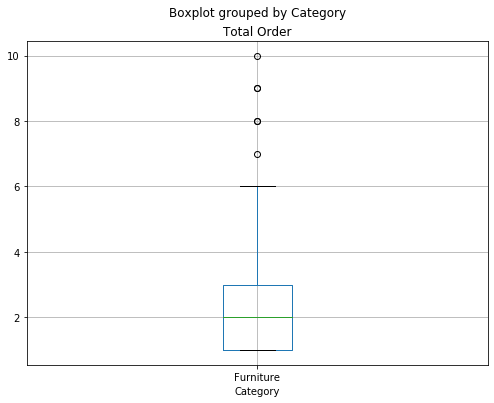

In [161]:
df_group_list_pr.boxplot(column='Total Order', by='Category', figsize=(8,6))

Text(0.5, 0, 'Order Date')

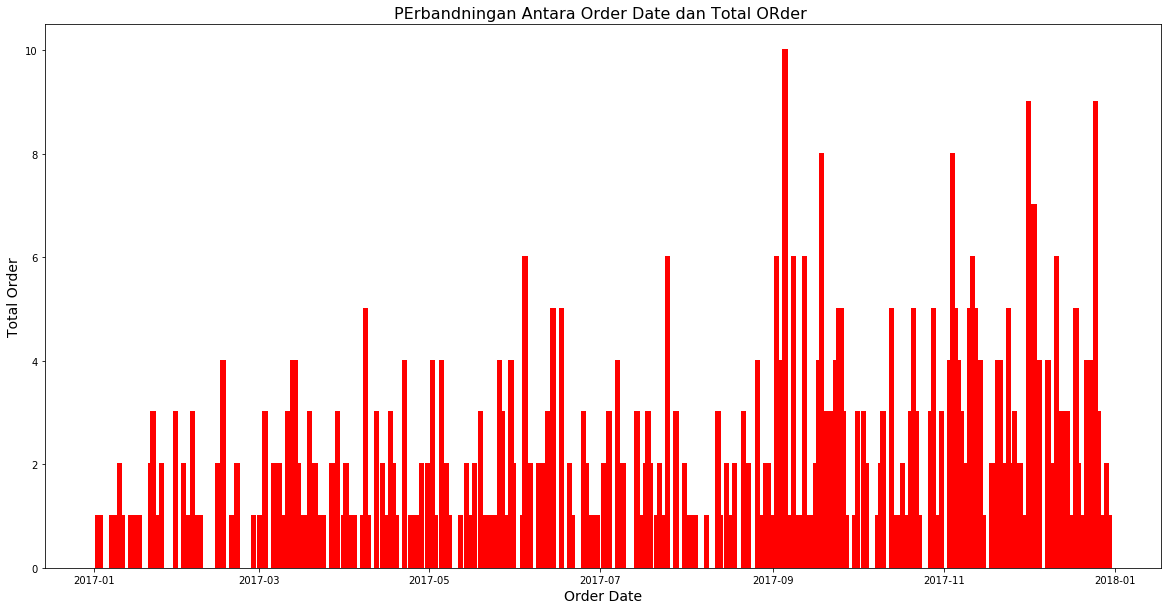

In [162]:
x = df_group_list_pr['Order Date']
y = df_group_list_pr['Total Order']

plt.figure(figsize=(20,10))
barh = plt.bar(x=x, height=y, data=df_group_list_pr, 
       color = 'y', # bar colors
       edgecolor= 'red', # edge bar colors
       linewidth = 3) # line width of bar
plt.title('PErbandningan Antara Order Date dan Total ORder ', fontsize = 16) #add title
plt.ylabel('Total Order', fontsize=14) # y axis label
plt.xlabel('Order Date', fontsize=14) # x axis label





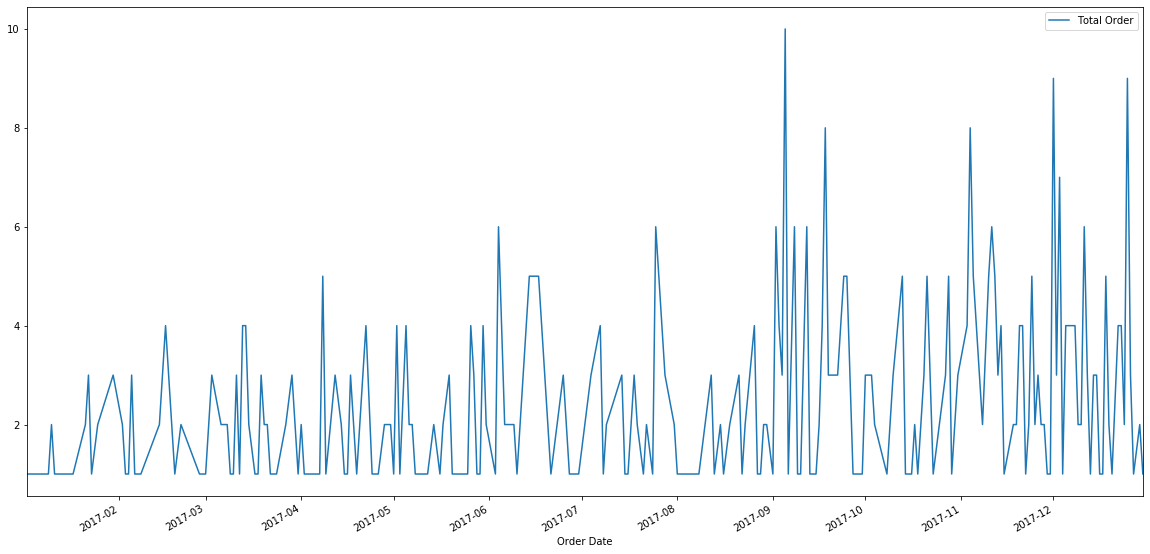

In [163]:
df_group_list_pr[df_group_list_pr['Order Date'] >= '2017-01-01'].plot.line(x='Order Date', y='Total Order', figsize=(20,10))